In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('datasets/data_task4_old.txt', delimiter = '\t', parse_dates=['assigned_ts', 'closed_ts'])

In [3]:
def first_EDA(df):
    df['ts_duration'] = (df['closed_ts'] - df['assigned_ts']).astype('timedelta64[s]')
    return df

In [4]:
data = first_EDA(data)

In [5]:
data.describe(percentiles=[.25, .5, .75, .8, .9, .95]).T

,count,mean,std,min,25%,50%,75%,80%,90%,95%,max
tid,701827.0,1.884911e+08,1.391113e+07,113958641.0,190684611.0,193537280.0,196366747.0,196912981.6,197788884.8,198150114.4,198575798.0
Microtasks,701827.0,3.254390e+00,3.653970e+00,1.0,1.0,2.0,4.0,5.0,9.0,10.0,50.0
ts_duration,701827.0,1.929660e+03,1.244649e+04,-729.0,67.0,157.0,435.0,576.0,1320.0,3978.0,2043178.0


In [6]:
data = data[(data.ts_duration > 0) & (data.ts_duration <= 3978)]

In [7]:
data.drop(['ts_duration'], inplace=True, axis=1)

In [8]:
def add_time_features(df):
    df['ts_duration'] = (df['closed_ts'] - df['assigned_ts']).astype('timedelta64[s]')
    df['ts_duration_min'] = (df['closed_ts'] - df['assigned_ts']).astype('timedelta64[m]').round(2)
    df.drop(['assigned_ts','closed_ts'], inplace=True, axis=1)
    return df

In [9]:
data = add_time_features(data)

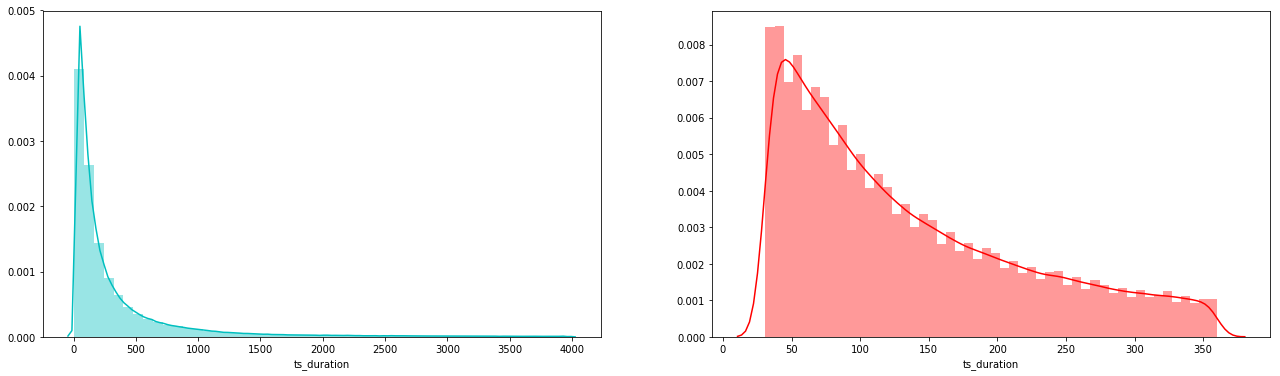

In [107]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(22,6))
sns.distplot(data.ts_duration, color = 'c', ax=axes[0])
sns.distplot(data[(data.ts_duration >30)&(data.ts_duration <=360)].ts_duration, color = 'r', ax=axes[1])
#sns.scatterplot(x='ts_duration', y='Microtasks', data = data[(data.ts_duration <=30)], ax=axes[1])

In [40]:
data.describe(percentiles=[.25, .5, .75, .8, .9, .95]).T

,count,mean,std,min,25%,50%,75%,80%,90%,95%,max
tid,666737.0,1.889247e+08,1.358064e+07,113958641.0,190731184.0,193580594.0,196389658.0,196972383.6,197792020.8,198151795.4,198575798.0
Microtasks,666737.0,3.055731e+00,3.448992e+00,1.0,1.0,1.0,4.0,5.0,8.0,10.0,50.0
ts_duration,666737.0,3.416675e+02,5.416049e+02,3.0,64.0,144.0,361.0,458.0,844.0,1368.0,3978.0
ts_duration_min,666737.0,5.199326e+00,9.033627e+00,0.0,1.0,2.0,6.0,7.0,14.0,22.0,66.0


(30, 250)

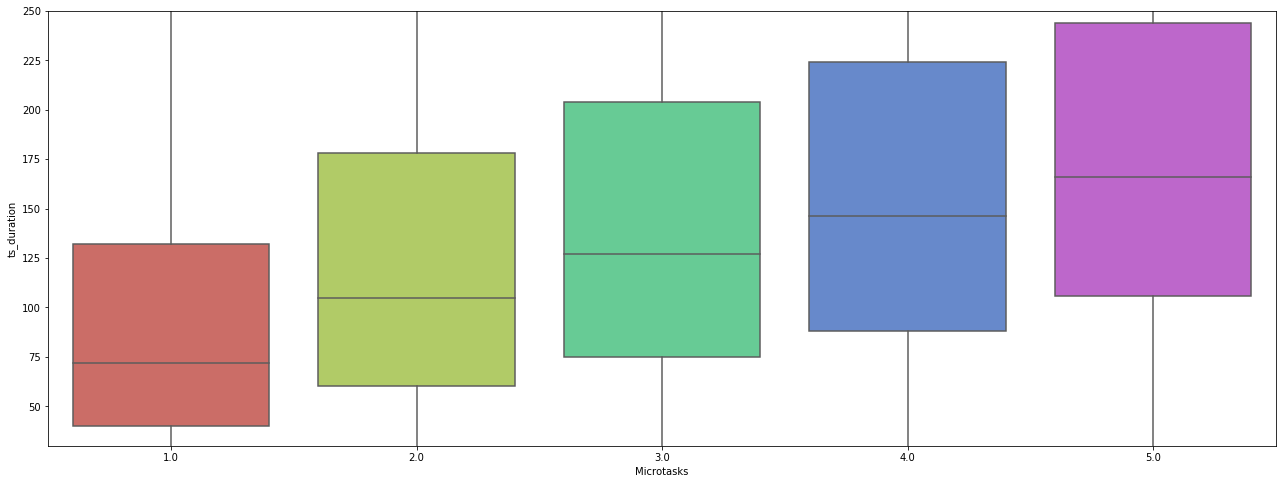

In [108]:
_, axes = plt.subplots(nrows=1, ncols=1, figsize=(22,8))
sns.boxplot(x='Microtasks', y='ts_duration', 
               data = data[(data.Microtasks<=5)&(data.ts_duration <=360)], palette="hls")
axes.set_ylim(30,250)

(100, 180)

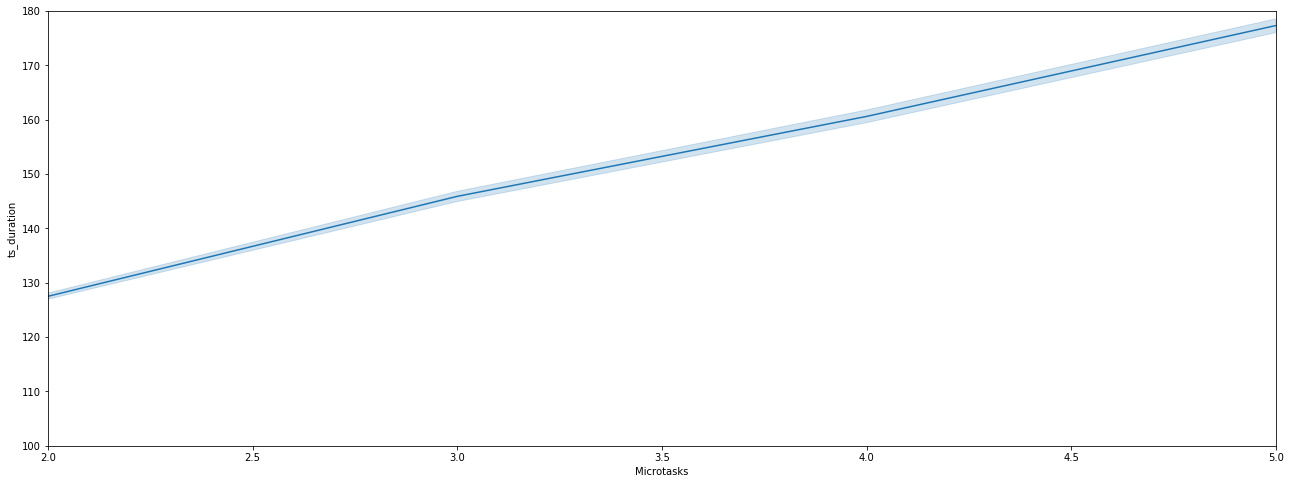

In [113]:
_, axes = plt.subplots(nrows=1, ncols=1, figsize=(22,8))
sns.lineplot(x='Microtasks', y='ts_duration', 
               data = data[(data.Microtasks<=5)&(data.ts_duration <=360)])
axes.set_xlim(2,5)
axes.set_ylim(100,180)

In [ ]:
#30 seconds per one microtask